In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.utils import check_random_state

train_samples = 500
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)

# Permute the data to shuffle it
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

X = X.reshape((X.shape[0], -1))
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=100)


C:\Users\Dojitha Mirihagalla\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


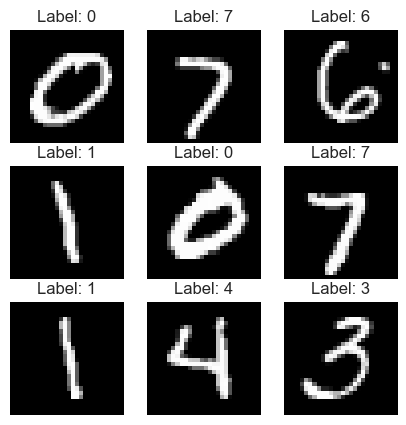

In [41]:
# Print a couple of images and their labels
plt.figure(figsize=(5, 5))
for i in range(9):  # Print two images
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.show()

In [21]:
# Create a pipeline with scaling and Lasso logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the data
    ('lasso_logistic', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])

# Create a parameter grid for the grid search
param_grid = {
    'lasso_logistic__C': np.logspace(-2, 2, 9)
}

# Create a grid search cross-validation object
grid_search = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model to the data and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


C:\Users\Dojitha Mirihagalla\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Hyperparameters: {'lasso_logistic__C': 3.1622776601683795}


C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_5256\4182242896.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


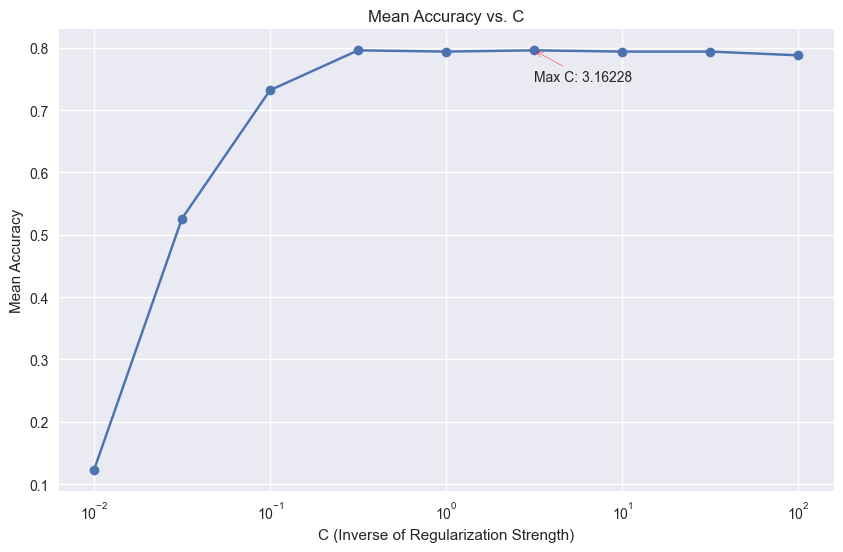

In [24]:
# Extract the mean cross-validated scores for each C value
mean_scores = grid_search.cv_results_['mean_test_score']

# Find the index corresponding to the maximum mean score
best_index = np.argmax(mean_scores)

# Find the corresponding value of C using the best index
best_C = param_grid['lasso_logistic__C'][best_index]

# Plot the mean scores against C values in a semilogarithmic plot
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))
plt.semilogx(param_grid['lasso_logistic__C'], mean_scores, marker='o')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Accuracy')
plt.title('Mean Accuracy vs. C')
plt.grid(True)

# Annotate the maximum value of C with an arrow from below
plt.annotate(
    f'Max C: {best_C:.5f}',  # Annotation text with the best C value
    xy=(best_C, mean_scores[best_index]),  # Position of the annotation
    xytext=(best_C, mean_scores[best_index] - 0.05),  # Text position
    arrowprops=dict(arrowstyle='->', color='red')  # Arrow properties for annotation
)

# Display the plot
plt.show()


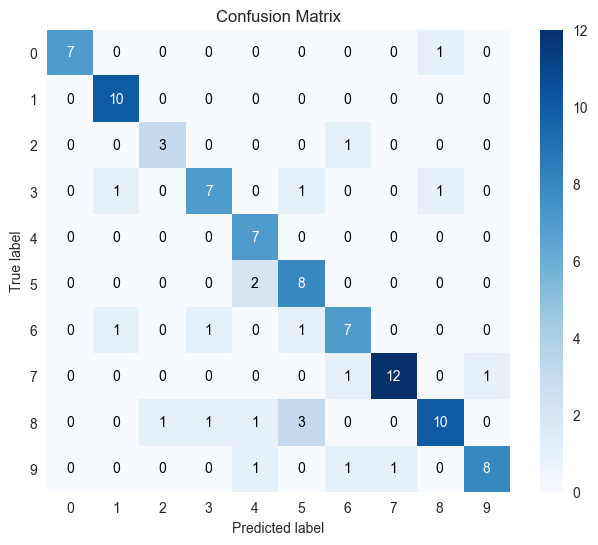

Precision: 0.807537
Recall: 0.790000
F1-score: 0.790000


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set using the best model from grid search
y_pred = grid_search.predict(X_test)

# Calculate precision, recall, and F1-score, using the 'weighted' averaging method
# 'weighted' means it calculates metrics for each class and takes their weighted average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

import scikitplot as skplt
import matplotlib.pyplot as plt
# Plot the confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, figsize=(8, 6))
plt.show()


# Print precision, recall, and F1-score
print(f'Precision: {precision:.6f}')
print(f'Recall: {recall:.6f}')
print(f'F1-score: {f1:.6f}')
